In [2]:
# Pandas is used for data manipulation, numpy for numerical operations, arrays
import pandas as pd
import numpy as np

In [3]:
# Read in data and display first 5 rows
df = pd.read_csv('./Datasets/tempratures.csv')
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
# Shape of Dataset
print('The shape of our dataset is:', df.shape)

The shape of our dataset is: (348, 12)


In [5]:
# Summary of dataset
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
# Mean and median are nearly similar thus not much data anomaly

In [7]:
# Creating dates from Year-Month-Date

# Using datetime for dealing with dates
import datetime

# Get years, months, and days
years = df['year']
months = df['month']
days = df['day']

In [8]:
# Creating date as List and then converting to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [9]:
# Importing matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1,'Max Temp')

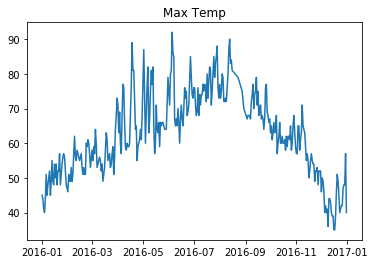

In [10]:
# Actual max temperature measurement
plt.plot(dates, df['actual'])
plt.title('Max Temp')
#set_xlabel(''); set_ylabel('Temperature'); set_title('Max Temp')

Text(0.5,1,'Previous Max Temp')

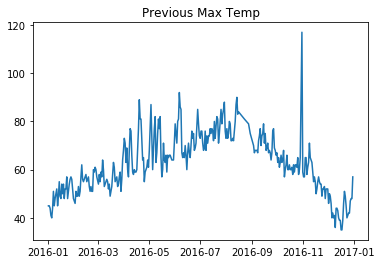

In [11]:
# Temperature from 1 day ago
plt.plot(dates, df['temp_1'])
plt.title('Previous Max Temp')

Text(0.5,1,'Two Days Prior Max Temp')

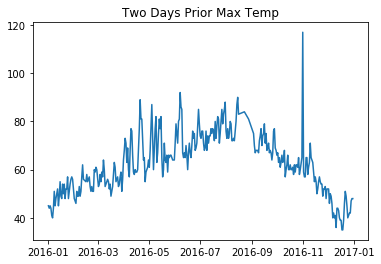

In [12]:
# Temperature from 2 days ago
plt.plot(dates, df['temp_2'])
plt.title('Two Days Prior Max Temp')

Text(0.5,1,'Friend Estimate')

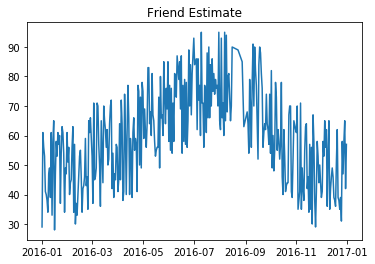

In [13]:
# Friend Estimate
plt.plot(dates, df['friend'])
plt.title('Friend Estimate')

In [14]:
# One hot encoding
df = pd.get_dummies(df)
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [15]:
# Checking the shape
print('Shape of dataset after one-hot encoding:', df.shape)

Shape of dataset after one-hot encoding: (348, 18)


In [17]:
# Labels are the values we want to predict
labels = np.array(df['actual'])

In [20]:
# Remove the labels from the features
# axis 1 refers to the columns
df= df.drop('actual', axis = 1)

In [21]:
# Saving feature names for later use
feature_list = list(df.columns)

In [22]:
# Convert to numpy array
df = np.array(df)